In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/highest-grossing-mobile-games/mobile-games.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('/kaggle/input/highest-grossing-mobile-games/mobile-games.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Game             104 non-null    object
 1   Revenue          104 non-null    int64 
 2   Initial release  104 non-null    object
 3   Publisher(s)     104 non-null    object
 4   Genre(s)         104 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


                              Game      Revenue Initial release  \
0  Honor of Kings / Arena of Valor  14667500000      2015-11-26   
1                   Monster Strike  10000000000      2013-08-08   
2                      PUBG Mobile   9000000000      2018-03-19   
3                 Puzzle & Dragons   8578340000      2012-02-20   
4                   Clash of Clans   8000000000      2012-08-02   
5                       Pokémon Go   7760000000      2016-07-06   
6                 Candy Crush Saga   7456000000      2012-11-14   
7                 Fate/Grand Order   6300000000      2015-07-30   
8         Fantasy Westward Journey   4700000000      2015-03-26   
9                 Garena Free Fire   4330000000      2017-12-04   

                               Publisher(s)                 Genre(s)  
0                             Tencent Games                     MOBA  
1                                      Mixi  Puzzle / RPG / Strategy  
2       Tencent Games / Krafton / VNG Games      

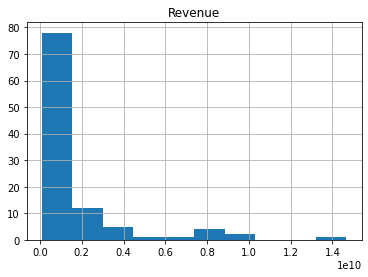

                                   Revenue
Genre(s)                                  
ARPG / Hack & slash              731000000
Action RPG                      4799000000
Augmented reality               8687720000
Battle royale                  16015270000
Casual / Casino                 3008000000
DCCG                             773840000
DCCG / Rhythm                    524000000
Digital collectible card game    284000000
Fighting                        1784000000
GCS / MMO                       3919000000
MMORPG                         13882755000
MOBA                           17853500000
Online Bingo                     443000000
Physics / Puzzle                 332500000
Puzzle                         14875600000
Puzzle / Decoration             5512000000
Puzzle / RPG                     186000000
Puzzle / RPG / Strategy        10000000000
Puzzle / Strategy                151000000
RPG                            13453200000
RPG / Puzzle                   12078340000
Racing     

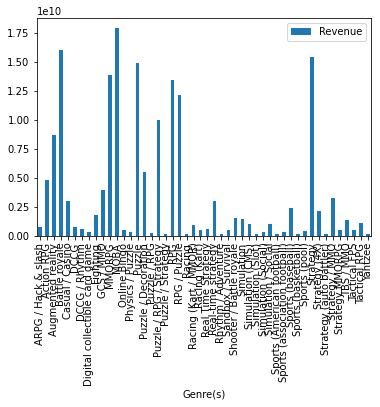

                     Revenue
Initial release             
2010               400000000
2011               649000000
2012             31318440000
2013             13800000000
2014              9037200000
2015             36954600000
2016             24133510000
2017             17065720000
2018             19222000000
2019              8845920000
2020              5101590000
2021              1650985000


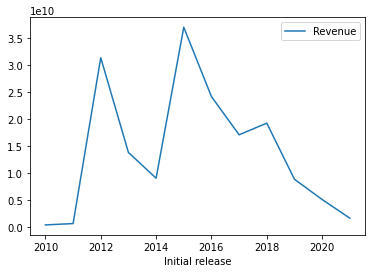

In [5]:
df=data.copy()
# Convert the Initial release column to a datetime data type
df['Initial release'] = pd.to_datetime(df['Initial release'])

# Now, let's take a look at the top 10 games in terms of revenue
top_10_games = df.sort_values('Revenue', ascending=False).head(10)
print(top_10_games)

# We can also visualize the distribution of revenue using a histogram
df.hist('Revenue')
plt.show()

# Let's group the data by genre and calculate the total revenue for each genre
genre_revenue = df.groupby('Genre(s)').sum()
print(genre_revenue)

# We can visualize the results using a bar chart
genre_revenue.plot.bar(y='Revenue')
plt.show()

# Finally, let's group the data by year and calculate the total revenue for each year
yearly_revenue = df.groupby(df['Initial release'].dt.year).sum()
print(yearly_revenue)

# We can visualize the results using a line chart
yearly_revenue.plot()
plt.show()

In [6]:
# Group the data by genre and calculate the total revenue for each genre
genre_revenue = df.groupby('Genre(s)').sum()
print(genre_revenue)


                                   Revenue
Genre(s)                                  
ARPG / Hack & slash              731000000
Action RPG                      4799000000
Augmented reality               8687720000
Battle royale                  16015270000
Casual / Casino                 3008000000
DCCG                             773840000
DCCG / Rhythm                    524000000
Digital collectible card game    284000000
Fighting                        1784000000
GCS / MMO                       3919000000
MMORPG                         13882755000
MOBA                           17853500000
Online Bingo                     443000000
Physics / Puzzle                 332500000
Puzzle                         14875600000
Puzzle / Decoration             5512000000
Puzzle / RPG                     186000000
Puzzle / RPG / Strategy        10000000000
Puzzle / Strategy                151000000
RPG                            13453200000
RPG / Puzzle                   12078340000
Racing     

In [7]:
df = df.rename(columns={'Genre(s)': 'Genres', 'Publisher(s)': 'Publishers'})


In [8]:
df['Initial release'] = pd.to_datetime(df['Initial release'])
yearly_revenue = df.groupby(df['Initial release'].dt.year)['Revenue'].sum()


In [9]:
# First, we'll need to install Plotly:
# !pip install plotly

# Next, we'll import the necessary libraries
import plotly.express as px

# Create an interactive line chart using Plotly
fig = px.line(yearly_revenue, x=yearly_revenue.index, y='Revenue', title='Total Revenue by Year')
fig.show()


In [10]:


# Convert the Initial release column to datetime
df['Initial release'] = pd.to_datetime(df['Initial release'])

# Group the data by year and publisher and calculate the total revenue for each combination
yearly_revenue_by_publisher = df.groupby(['Initial release', 'Publishers']).sum()

# Print the resulting dataframe
print(yearly_revenue_by_publisher)


                                                Revenue
Initial release Publishers                             
2010-10-15      Miniclip                      400000000
2011-11-07      Playtika                      149000000
2011-11-18      Mojang Studios                500000000
2012-02-20      GungHo Online Entertainment  8578340000
2012-02-24      Playrix                       922100000
...                                                 ...
2020-10-27      Riot Games (Tencent)          505000000
2020-11-27      Bubblegum Games               218000000
2021-02-24      Cygames                       990000000
2021-09-09      NetEase / Portkey Games       358000000
2021-11-04      NCsoft                        302985000

[104 rows x 1 columns]


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Game             104 non-null    object        
 1   Revenue          104 non-null    int64         
 2   Initial release  104 non-null    datetime64[ns]
 3   Publishers       104 non-null    object        
 4   Genres           104 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 4.2+ KB
